# Importing Packages

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Exploration

In [6]:
df= pd.read_csv("suicide.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.head()

,Tweet,Suicide
0,i hate myself so much i want to KILL myself ho...,Potential Suicide post
1,RT @DrugForumsBest: I woke up with a bag over ...,Potential Suicide post
2,i wanna fucking kill myself,Potential Suicide post
3,why do i destroy all my opportunities? am i go...,Potential Suicide post
4,u - understand what the fuck im doing wrong wi...,Potential Suicide post


In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1597 non-null   object
 1   Suicide  1597 non-null   object
dtypes: object(2)
memory usage: 37.4+ KB


# Data Cleaning & Processing

In [10]:
def cleaner(text):
    text = text.lower()
    text = re.sub("@[^\s]+","",text)
    text = text.replace(":)","")  
    text = text.replace("@","") 
    text = text.replace("#","") 
    text = text.replace(":(","")
    return text

In [11]:
def remove_stop_words(text):
    sw = stopwords.words("english")
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

In [12]:
def stemming(text):
    ps = PorterStemmer()
    text = text.split()
    stemmed_words = []
    for word in text :
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [13]:
def run(text):
    text = cleaner(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
df['Tweet'] = df['Tweet'].apply(run)

# Vectorization

In [16]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["Tweet"])

In [17]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Suicide']= label_encoder.fit_transform(df['Suicide'])

# Feature Selection

In [18]:
X = x.toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y = df['Suicide'].values
y

array([1, 1, 1, ..., 0, 0, 0])

# Data Splitting

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [22]:
LR = lr.score(x_test,y_test) * 100

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       399
           1       0.68      0.95      0.79       129

    accuracy                           0.88       528
   macro avg       0.83      0.90      0.85       528
weighted avg       0.91      0.88      0.88       528



In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[341,  58],
       [  7, 122]])

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[337  11]
 [ 16 164]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       353
           1       0.91      0.94      0.92       175

    accuracy                           0.95       528
   macro avg       0.94      0.95      0.94       528
weighted avg       0.95      0.95      0.95       528



In [27]:
from sklearn.metrics import accuracy_score
val1 = accuracy_score(y_test, predictions)*100
print(val1)

94.88636363636364


# Decision Tree Classifier

In [28]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[323  25]
 [ 15 165]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       338
           1       0.92      0.87      0.89       190

    accuracy                           0.92       528
   macro avg       0.92      0.91      0.92       528
weighted avg       0.92      0.92      0.92       528



In [30]:
val2 = accuracy_score(y_test, predictions)* 100
print(val2)

92.42424242424242


# Support Vector Machine

In [31]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train, y_train)
predictions = SVM.predict(x_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val4, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  90.3409090909091 

*Confusion Matrix for SVM: 
[[340   8]
 [ 43 137]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       348
           1       0.94      0.76      0.84       180

    accuracy                           0.90       528
   macro avg       0.92      0.87      0.89       528
weighted avg       0.91      0.90      0.90       528



# KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val5, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  68.93939393939394 

*Confusion Matrix for KNN: 
[[348   0]
 [164  16]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       348
           1       1.00      0.09      0.16       180

    accuracy                           0.69       528
   macro avg       0.84      0.54      0.49       528
weighted avg       0.79      0.69      0.59       528



# XGB Classifier

In [33]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
val6 = accuracy_score(y_test, predictions) * 100
print("Accuracy: %.2f%%" % (val6))

Accuracy: 92.99%


# Extreme Learning Machine

In [34]:
!pip install git+https://github.com/masaponto/python-elm

  Cloning https://github.com/masaponto/python-elm to /tmp/pip-req-build-od12bxur
  Running command git clone -q https://github.com/masaponto/python-elm /tmp/pip-req-build-od12bxur
  Created wheel for elm: filename=elm-0.4.1-py3-none-any.whl size=5446 sha256=7e77c29e169a30521584add5a554c1432d01df076edf278a1fec831498c502ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-opcg9csh/wheels/33/8f/ce/8a590532a28ea23b5808dfce3a905cd3af8289166ba6894b3c
Successfully built elm


In [35]:
from elm import ELM

In [36]:
elm = ELM(hid_num=1).fit(x_train, y_train)

In [37]:
val7 = elm.score(x_test, y_test)*100

In [38]:
from sklearn.model_selection import KFold, cross_val_score
hid_nums = [10, 20, 30]
for hid_num in hid_nums:
    print(hid_num, end=' ')
    e = ELM(hid_num)

    ave = 0
    for i in range(10):
        cv = KFold(n_splits=5, shuffle=True)
        scores = cross_val_score(e, x_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        ave += scores.mean()

    ave /= 10

    print("Accuracy: %0.3f " % (ave))

10 Accuracy: 0.354 
20 Accuracy: 0.353 
30 Accuracy: 0.351 


# Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('RFC', RandomForestClassifier()))
estimator.append(('DTC', DecisionTreeClassifier()))
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
predictions = vot_hard.predict(x_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val8, "\n")
print("*Confusion Matrix for Voting CLassifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  95.26515151515152 

*Confusion Matrix for Voting CLassifier: 
[[340   8]
 [ 17 163]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       348
           1       0.95      0.91      0.93       180

    accuracy                           0.95       528
   macro avg       0.95      0.94      0.95       528
weighted avg       0.95      0.95      0.95       528



# Accuracy Comparsion

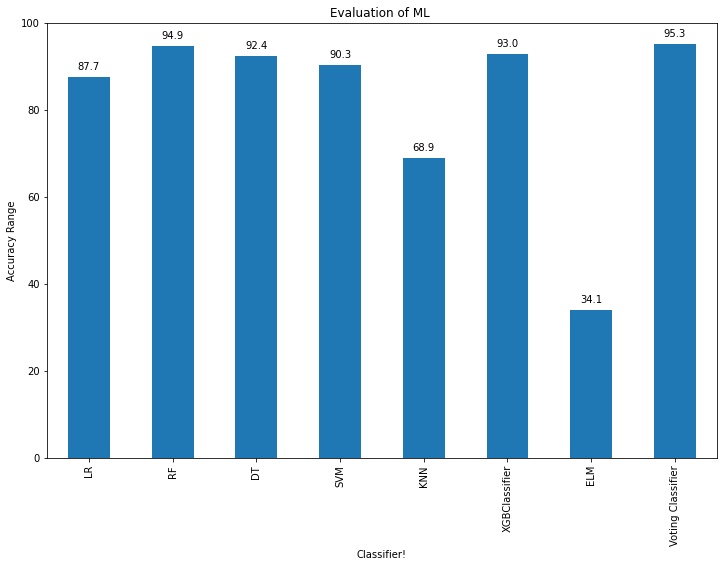

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [LR,val1,val2,val4,val5,val6,val7,val8]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['LR','RF','DT','SVM','KNN','XGBClassifier','ELM','Voting Classifier']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML ')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()